# <font style = "color:rgb(50,120,229)">Color Tone Adjustment using Curves</font>

In image enhancement, manipulating color channels using curves is a very important technique. It maps the original colors and brightness of an image to values specified by the user. This is one of the mostly used feature in Photoshop. But Photoshop is manual work, why not write a piece of code for doing that? We will see how we can use this simple yet powerful way of adjusting colors by adding warming and cooling effects to an image.

Consider the curves for the warming filter shown below. The red curve is applied to the Red channel and the Blue curve to the blue channel of the original image. The dotted black line with a slope of 1, is the original mapping. We take some points on the black line and move them. The rest of the points between them are interpolated. If we move the points above the black line as in the case of the Red Channel, the resulting intensity values of red channel increase as given by the y-axis values. Similarly the values decrease for the Blue Channel. 

<center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m2-warmingEffectResult.jpg"/></center>

<center>Figure : Curves for Warming filter. X-axis - Original Values of intensity, Y-axis - Modified values.</center>

For example, the original intensity value of 50 is increased to 80 for Red channel and decreased to 20 for Blue channel. Thus we get a mapping between the intensity values of the original and the desired output. This mapping is then applied to all the pixels of a given image using a lookup table. The lookup table will store the mapping from the original intensity values to the modified intensity values. As may be evident, the same curve can be applied to all the three channels too.

Let’s see the code and results of the warming and cooling filters. We will also learn how to design instagram-like filters in the following sections.

**<font style = "color:rgb(255,0,0)">Note:</font>** In the code shared here, we are using piecewise linear curves to keep things simple. It may be desirable to smooth these curves in a real world application.

## <font style = "color:rgb(50,120,229)">Warming Filter Code [ warming.py ]</font>

In this program, we will perform color adjustment in B and R channels of the image to produce a cooling effect.

In [1]:
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

First, we read the image from a file specified by the filename. We create a copy of the original image to serve as a placeholder for output.

In [2]:
filename = "data/images/girl.jpg"
original = cv2.imread(filename)
img = np.copy(original)

Next, we specify the intensity values in the R and B channels on the original curve ( black dashed line ) that needs to be modified as explained earlier. We create a lookUp table to store the interpolated values so that we get a mapping from the original values to the modified values for each intensity level.

In [3]:
# Pivot points for X-Coordinates
originalValue = np.array([0, 50, 100, 150, 200, 255])

# Changed points on Y-axis for each channel
rCurve = np.array([0, 80, 150, 190, 220, 255])
bCurve = np.array([0, 20, 40, 75, 150, 255])

# Create a Lookup Table
fullRange = np.arange(0, 256)
rLUT = np.interp(fullRange, originalValue, rCurve)
bLUT = np.interp(fullRange, originalValue, bCurve)

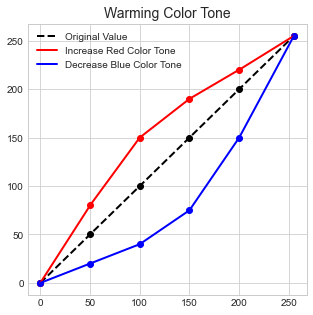

In [4]:
# Visualize Curve result on the Red & Blue channels
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(fullRange, c='black', linestyle='dashed', linewidth=2, label='Original Value')
ax.scatter(originalValue, originalValue, c='black')
ax.plot(rLUT, c='red', linewidth=2, label='Increase Red Color Tone')
ax.scatter(originalValue, rCurve, c='red')
ax.plot(bLUT, c='blue', linewidth=2, label='Decrease Blue Color Tone')
ax.scatter(originalValue, bCurve, c='blue')
plt.legend()
plt.title('Warming Color Tone', fontsize=14)
plt.show()



| Plot showing the resulting Curves for Red and Blue channels for warming effect. The dashed black line indicates the original values without bending the curves.     |
| -------- |
| <center> <img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m2-warmingEffectResult.jpg"/></center>  | 

Then we use the lookUp Table to map the pixel values in the original image to the output image for both the channels and merge the modified channels to get the final output.

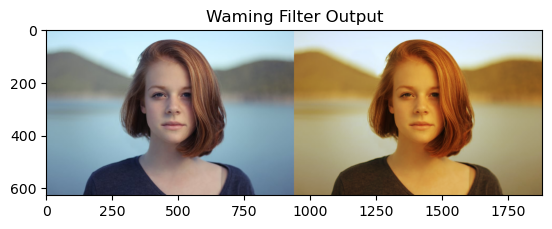

In [5]:
plt.style.use('default')

# Get the blue channel and apply the mapping
bChannel = img[:,:,0]
bChannel = cv2.LUT(bChannel, bLUT)
img[:,:,0] = bChannel

# Get the red channel and apply the mapping
rChannel = img[:,:,2]
rChannel = cv2.LUT(rChannel, rLUT)
img[:,:,2] = rChannel

# Show and save the output
combined = np.hstack([original, img])
plt.imshow(combined[:,:,::-1])
plt.title("Waming Filter Output")
plt.show()

## <font style = "color:rgb(50,120,229)">Cooling Filter Code [ cooling.py ]</font>

In this program, we will perform color adjustment in B and R channels of the image to produce a cooling effect.

First, we read the image from a file specified by the command line or use the default one. We create a copy of the original image to serve as a placeholder for output.

In [6]:
original = cv2.imread(filename)
img = np.copy(original)

Next, we specify the intensity values in the R and B channels on the original curve ( black dashed line ) that needs to be modified as explained earlier. We create a lookUp table to store the interpolated values so that we get a mapping from the original values to the modified values for each intensity level.

In [7]:
# pivot points for X-Coordinates
originalValue = np.array([0, 50, 100, 150, 200, 255])

# Changed points on Y-axis for each channel
bCurve = np.array([0, 80, 150, 190, 220, 255])
rCurve = np.array([0, 20,  40,  75, 150, 255])

# Create a LookUp Table
fullRange = np.arange(0,256)
rLUT = np.interp(fullRange, originalValue, rCurve )
bLUT = np.interp(fullRange, originalValue, bCurve )

| <center> <img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/pcv4face-w2-m2-coolingEffectResults.jpg"/></center>  | 
| -------- |
| Plot showing the resulting Curves for Red and Blue channels for cooling effect. The dashed black line indicates the original values without bending the curves.     |

Next, we use the lookUp Table to map the pixel values in the original image to the output image for both the channels and merge the modified channels to get the final output.

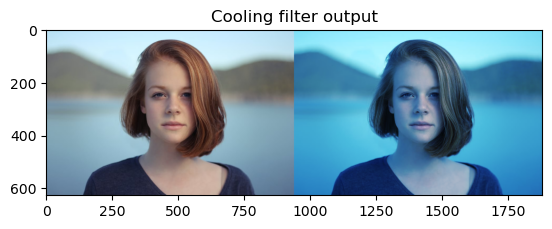

In [8]:
# Get the blue channel and apply the mapping
bChannel = img[:,:,0]
bChannel = cv2.LUT(bChannel, bLUT)
img[:,:,0] = bChannel

# Get the red channel and apply the mapping
rChannel = img[:,:,2]
rChannel = cv2.LUT(rChannel, rLUT)
img[:,:,2] = rChannel

# show and save the ouput
combined = np.hstack([original,img])

plt.imshow(combined[:,:,::-1])
plt.title("Cooling filter output")
plt.show()

## <font style = "color:rgb(50,120,229)">Some more variations</font>

Let’s see some more curves and what effect they can produce in an image. In these curves, we have changed all the channels, we use the red color for showing the curve. You can try out different combinations of pivot points for different channels and check how the output image changes.

| <center>**Curve**</center> | <center>**Result Image**</center> | <center>**Effects**</center> |
| :--------: | :--------: | -------- |
| <center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m2-result1graph.jpg" width=330 /></center>    | <center> <img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m2-result1.jpg" width = 330/></center>     | <div align='left'><ul><li>Keeps the bright areas same</li><li>Makes the dark areas brighter</li><li>Decreases contrast</li><li>Increases brightness</li></ul> </div>|
|<center><img src = "http://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m2-result2graph.jpg" width=330 /></center>|<center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m2-result2.jpg" width=330 /></center>| <div align='left'><ul><li>Keeps dark areas same</li><li>Makes bright areas brighter</li><li>Increases contrast</li></ul> </div>|
|<center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m2-result3Graph.jpg" width=330 /></center>|<center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m2-result3.jpg" width=330 /></center>|<div align='left'><ul><li>Keeps dark areas same</li><li>Makes bright areas darker</li><li>Decreases the contrast and brightness</li></ul> </div> |
|<center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m2-result4graph.jpg" width=330 /></center>|<center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m2-result4.jpg" width=330 /></center>|<div align='left'><ul><li>Keeps bright areas same</li><li>Makes dark areas darker</li><li>Intensifies shadows</li></ul> </div>|
|<center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m2-result5-graph.jpg" width=330 /></center>|<center><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m2-result5.jpg" width=330 /></center>|<div align='left'><ul><li>Makes dark areas darker and bright areas brighter</li><li>Intensifies shadows and highlights</li><li>Most commonly used</li></ul> </div>|